# Introduction

Kaggle is a very popular website for playing around with data and participating in data science competition.  With the hype around Machine Learning, Deep Learning, and Data Science, it is not surprising that there are many kernels uploaded everyday.  This journal will go through the most popular kernels and perform some EDA.

## Questions

I want to ask the following questions:

* __[What tags are the most popular?](#poptag)__
* __[Who has the most kernels?](#mostkern)__
* __[For the person with the most kernels, what popular tags are associated with them?](#mostkernassoc)__
* __[Who has made the most revisions?](#mostrev)__
* __Who has received the most:__
    * __[Votes?](#mostvotes)__
    * __[Views?](#mostviews)__
    * __[Comments?](#mostcomm)__
    * __[Forks?](#mostfork)__
* __[What language is most often used with kernels?](#mostlang)__
    
__Note:__ The dataset only covers kernels that have had at least 33 votes.

## Loading the data

The first step is to load up the csv file containing the data. We want to get a gist on the data we'll be dealing with.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv("voted-kaggle-kernels.csv")
df.head()

,Votes,Owner,Kernel,Dataset,Version History,Tags,Output,Code Type,Language,Comments,Views,Forks
0,2130,Megan Risdal,Exploring Survival on the Titanic,Titanic: Machine Learning from Disaster,"Version 8,2017-12-27|Version 7,2017-02-24|Vers...","tutorial, beginner, feature engineering,",This script outputs 9 visualizations and 28 da...,Script,markdown,749,345590.0,3370.0
1,1395,Guido Zuidhof,Full Preprocessing Tutorial,Data Science Bowl 2017,"Version 19,2017-02-24|Version 18,2017-02-24|Ve...","tutorial, preprocessing",This script outputs 8 visualizations.,Notebook,Python,288,132387.0,1992.0
2,1363,Pedro Marcelino,Comprehensive data exploration with Python,House Prices: Advanced Regression Techniques,"Version 47,2018-02-23|Version 46,2018-02-16|Ve...","beginner, eda, data cleaning",This script doesn't output any visualizations ...,Notebook,Python,361,130419.0,2754.0
3,1316,Anisotropic,Introduction to Ensembling/Stacking in Python,Titanic: Machine Learning from Disaster,"Version 93,2018-02-07|Version 92,2018-01-15|Ve...","tutorial, ensembling, xgboost",This script outputs 2 visualizations and 1 dat...,Notebook,Python,395,147540.0,3360.0
4,1078,Kaan Can,Data ScienceTutorial for Beginners,Pokemon- Weedle's Cave,"Version 389,2018-02-26|Version 388,2018-02-26|...","beginner, data visualization",This script doesn't output any visualizations ...,Notebook,Python,397,68256.0,2229.0


Upon looking at the table, the Version History column needs some more cleaning.  As a helpful reference, we'll also create a new column for the number of revisions each kernel has undergone.

In [21]:
# Need to first separate out all of the versions in each set.
df["Version History"] = df["Version History"].str.split("|")

# Since not all kernels have revisions, we'll need to replace nan with empty lists
df.loc[df["Version History"].isnull(), "Version History"] = \
    df.loc[df["Version History"].isnull(), "Version History"].apply(lambda x: [])
    
df["Revisions"] = [len(row) for row in df["Version History"]]
df.head()

,Votes,Owner,Kernel,Dataset,Version History,Tags,Output,Code Type,Language,Comments,Views,Forks,Revisions
0,2130,Megan Risdal,Exploring Survival on the Titanic,Titanic: Machine Learning from Disaster,"[Version 8,2017-12-27, Version 7,2017-02-24, V...","tutorial, beginner, feature engineering,",This script outputs 9 visualizations and 28 da...,Script,markdown,749,345590.0,3370.0,8
1,1395,Guido Zuidhof,Full Preprocessing Tutorial,Data Science Bowl 2017,"[Version 19,2017-02-24, Version 18,2017-02-24,...","tutorial, preprocessing",This script outputs 8 visualizations.,Notebook,Python,288,132387.0,1992.0,19
2,1363,Pedro Marcelino,Comprehensive data exploration with Python,House Prices: Advanced Regression Techniques,"[Version 47,2018-02-23, Version 46,2018-02-16,...","beginner, eda, data cleaning",This script doesn't output any visualizations ...,Notebook,Python,361,130419.0,2754.0,47
3,1316,Anisotropic,Introduction to Ensembling/Stacking in Python,Titanic: Machine Learning from Disaster,"[Version 93,2018-02-07, Version 92,2018-01-15,...","tutorial, ensembling, xgboost",This script outputs 2 visualizations and 1 dat...,Notebook,Python,395,147540.0,3360.0,93
4,1078,Kaan Can,Data ScienceTutorial for Beginners,Pokemon- Weedle's Cave,"[Version 389,2018-02-26, Version 388,2018-02-2...","beginner, data visualization",This script doesn't output any visualizations ...,Notebook,Python,397,68256.0,2229.0,389


In fact, it would best to create a new DataFrame specific for revisions.

## Analyzing Revisions

Since there is a lot of revision data within each kernel, it's best to create a new DataFrame.  In this DataFrame, we'll be retrieving the Kernel ID and the revision number associated with the Kernel ID.

In [22]:
tmp = {"Kernel ID":[], "Revision":[]}
times = [] # Will be used for indexing
for index, row in df.iterrows():
    for versions in list(row["Version History"]):
        versionNum, versionDate = versions.split(',')
        tmp["Kernel ID"].append(index)
        tmp["Revision"].append(versionNum[versionNum.rfind(" ")+1:])
        # 
        times.append(versionDate)

revDF = pd.DataFrame(tmp, index = pd.DatetimeIndex(times))
revDF.sort_index(inplace=True)
revDF.index.name = "Date"
revDF.head()

,Kernel ID,Revision
Date,,
2015-03-26,292,1
2015-03-26,292,2
2015-04-04,675,1
2015-04-08,675,2
2015-04-10,675,3


With the new DataFrame created, let's plot out the revision on a yearly basis.

2015 has 1006 revisions
2016 has 3371 revisions
2017 has 14316 revisions
2018 has 2408 revisions


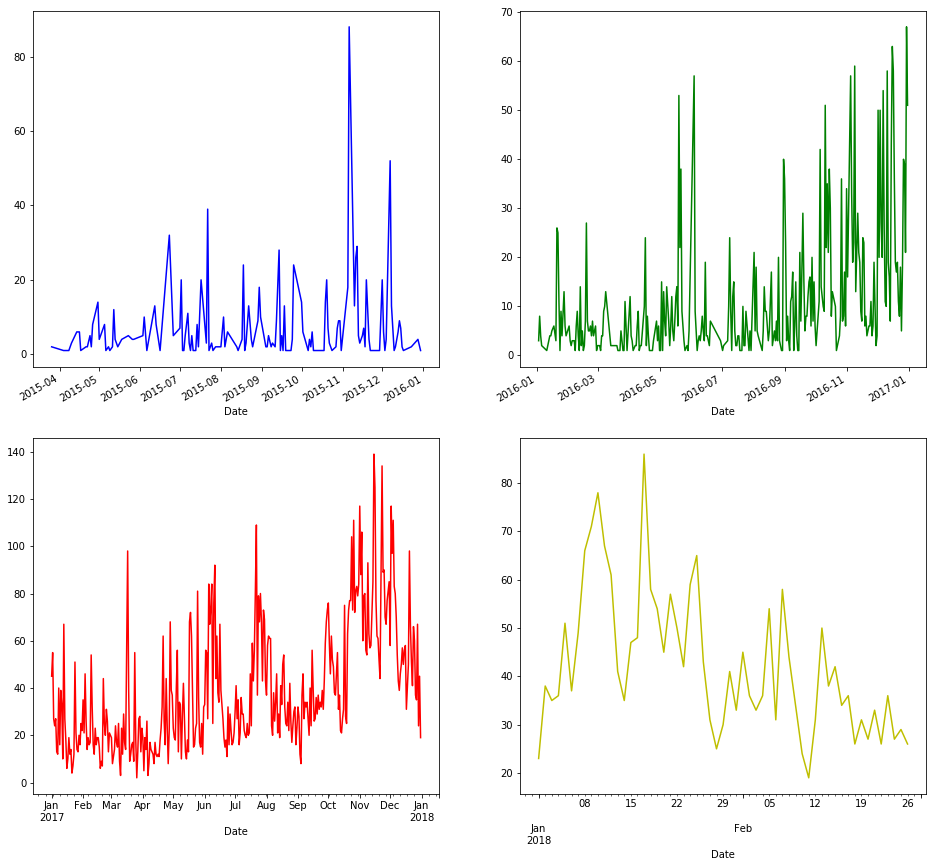

In [23]:
def nextAxis(maxRow, maxCol):
    curRow, curCol = 0, 0
    while maxRow > curRow:
        yield (curRow, curCol)
        curCol += 1
        if maxCol == curCol:
            curCol = 0
            curRow += 1
            
yearIter = range(2015, 2019)

fig, axes = plt.subplots(nrows=2, ncols=2)

axisGen = nextAxis(2, 2)

for year, color, axisPoints in zip(yearIter, ['b', 'g', 'r', 'y'], axisGen):
    valueDF = revDF['{}'.format(year)].groupby(["Date"])["Kernel ID"].count()
    
    print("{} has {} revisions".format(year, valueDF.sum()))

    # Get the next axis points
    points = [point for point in axisPoints]
    
    # Plot the graph
    valueDF.plot(kind = "line", figsize=(16,16), label=year, ax = axes[points[0], points[1]], color=[color])

Upon looking at the graphs, 2017 contains the most amount of revisions.  A lot of this is due to hype of Deep Learning and Data Science.

The number of revisions in 2018 is greater than 2015.  With some more time, the amount of revisions would surpass the amount from 2016.

## What tags are the most popular? <a name="poptag"></a>

Like revisions, it'd be best to separate tags into a separate DataFrame.  Our index will represent the Kernel ID and the tag represents a word.

__Note: There are multiple words for each index.  So, indexing will return multiple entries__

In [24]:
tags = df['Tags'].str.strip(',') # Remove unnecessary ','
tags = tags.str.split(',') # Split each tag into a separate element

tmp = {"Tag":[]}
indexes = [] # Will be used for indexing
# Since not all kernels have revisions, we'll need to replace nan with empty lists
index = 0
for row in tags:
    if type(row) != list:
        index += 1
        continue
    for tag in list(row):
        tmp["Tag"].append(tag)
        indexes.append(index)
    index += 1
        
# Now create the tag DataFrame
tagDF = pd.DataFrame(tmp, index = indexes)
tagDF.index.name = "Kernel ID"
tagDF.head()
tagDF.loc[1]

,Tag
Kernel ID,
1,tutorial
1,preprocessing


Now that we separated the tags, we can answer our question.  We'll be omitting tags that appear less than 6 times.

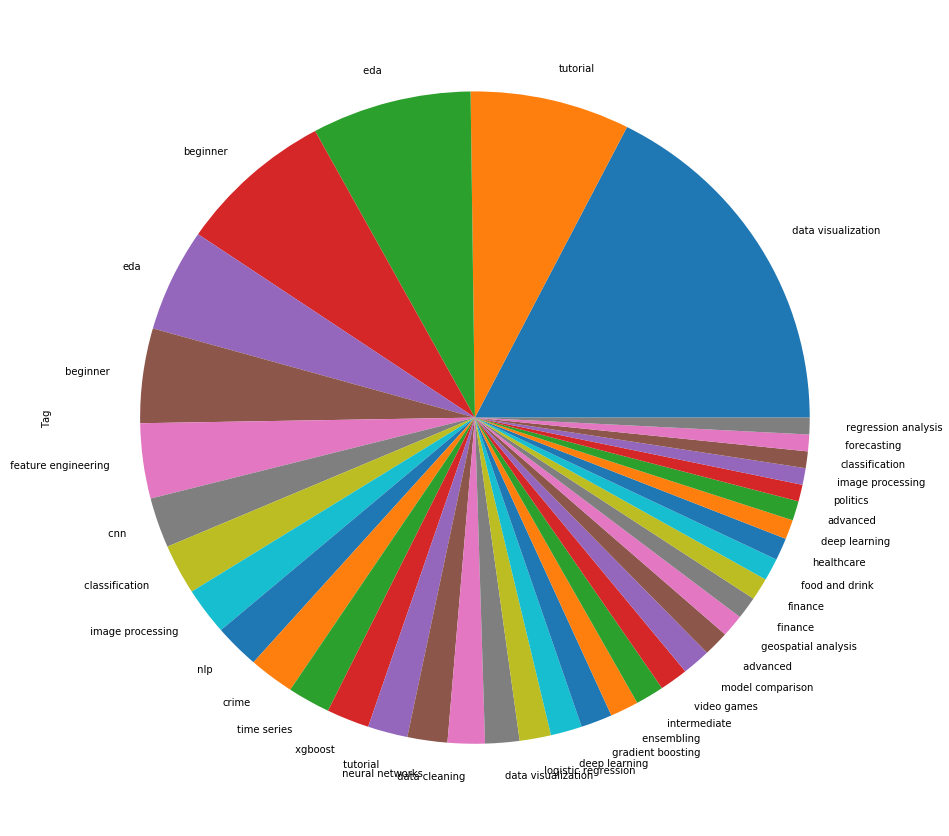

In [25]:
tagThreshold = 5

tagValueCount = tagDF['Tag'].value_counts()
tagValueCount[tagValueCount > tagThreshold].plot(kind='pie',figsize=(15,15))

The most common tag is __data visualization__ with __tutorial__ being the second most common.  I don't find this too surprising as many Data Science projects require the use of visualizations to tell stories.

## Who has the most kernels? <a name="mostkern"></a>

Who has created the most kernels in this dataset?  We can query owner to determine the person:

In [26]:
mostKernels = df['Owner'].value_counts()
mkUser = mostKernels.keys()[0]
mkUser

'DanB'

The answer is __DanB__, an employee at Kaggle.  Here is a list of his kernels:

In [27]:
mkuDF = df[df['Owner'] == mkUser]
mkuDF

,Votes,Owner,Kernel,Dataset,Version History,Tags,Output,Code Type,Language,Comments,Views,Forks,Revisions
27,390,DanB,How Models Work,no data sources,"[Version 9,2018-01-17, Version 8,2017-11-23, V...",NaN,This script doesn't output any visualizations ...,Notebook,Python,2,49272.0,145.0,9
43,310,DanB,Learning Materials on Kaggle,no data sources,"[Version 44,2017-11-03, Version 43,2017-11-03,...",NaN,This script doesn't output any visualizations ...,Notebook,Python,103,20303.0,292.0,44
89,184,DanB,Submitting From A Kernel,House Prices: Advanced Regression Techniques,"[Version 9,2018-01-23, Version 8,2018-01-22, V...",tutorial,This script outputs 1 data file.,Notebook,Python,60,10496.0,225.0,9
95,179,DanB,Starting Your ML Project,multiple data sources,"[Version 17,2018-02-23, Version 16,2018-01-22,...",NaN,This script doesn't output any visualizations ...,Notebook,Python,22,36843.0,514.0,17
111,166,DanB,Learn Machine Learning,no data sources,"[Version 8,2017-11-22, Version 7,2017-10-28, V...",tutorial,This script doesn't output any visualizations ...,Notebook,Python,14,15841.0,158.0,8
134,151,DanB,Selecting and Filtering in Pandas,multiple data sources,"[Version 7,2018-01-29, Version 6,2018-01-17, V...",NaN,This script doesn't output any visualizations ...,Notebook,Python,2,19618.0,202.0,7
142,149,DanB,Model Validation,multiple data sources,"[Version 8,2018-01-17, Version 7,2017-11-23, V...",NaN,This script doesn't output any visualizations ...,Notebook,Python,5,11563.0,72.0,8
173,127,DanB,"Underfitting, Overfitting and Model Optimization",multiple data sources,"[Version 10,2018-01-23, Version 9,2018-01-17, ...",tutorial,This script doesn't output any visualizations ...,Notebook,Python,4,10172.0,58.0,10
186,123,DanB,Your First Scikit-Learn Model,multiple data sources,"[Version 13,2018-01-18, Version 12,2017-12-05,...",NaN,This script doesn't output any visualizations ...,Notebook,Python,45,15794.0,180.0,13
209,115,DanB,Handling Missing Values,multiple data sources,"[Version 17,2018-01-29, Version 16,2018-01-24,...",tutorial,This script doesn't output any visualizations ...,Notebook,Python,43,14472.0,276.0,17


## For the person with the most kernels, what popular tags are associated with them? <a name="mostkernassoc"></a>

From the previous DataFrame, we notice that there are kernels where Dan defines no tags.  What percentage of his kernels contain tags?

In [28]:
print("{:.2f}%".format(mkuDF['Tags'].isnull().sum() / len(mkuDF) * 100))

60.87%


Now, from the kernels that do contain tags, what is the most popular tag that he uses?

/Users/josephwoolf/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


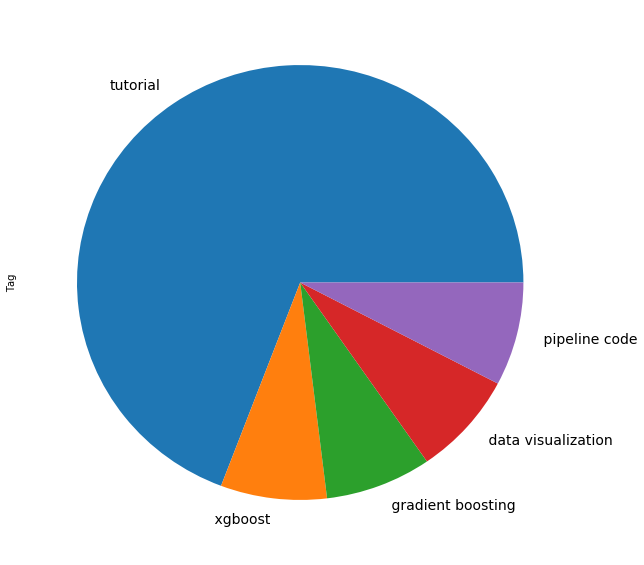

In [29]:
tagDF.loc[mkuDF.index, 'Tag'].value_counts().plot(kind = 'pie', figsize=(10, 10), fontsize=14)

The most common tag for Dan is __tutorial__.

## Who has made the most revisions? <a name="mostrev"></a>

Since many kernels have revisions, who made the most amount of revisions?

In [30]:
revOwn = df.groupby('Owner')['Revisions'].sum().sort_values(ascending=False)
mostRevUser = revOwn.keys()[0]
print("{} with {} revisions".format(mostRevUser, revOwn[mostRevUser]))

Kaan Can with 1722 revisions


## Who has received the most

### Votes? <a name="mostvotes"></a>

In [31]:
votesOwner = df.groupby('Owner')['Votes'].sum().sort_values(ascending=False)
mostVotesUser = votesOwner.keys()[0]
print("{} with {} votes".format(mostVotesUser, votesOwner[mostVotesUser]))

Anisotropic with 4164 votes


### Views? <a name="mostviews"></a>

In [32]:
viewsOwner = df.groupby('Owner')['Views'].sum().sort_values(ascending=False)
mostViewsUser = viewsOwner.keys()[0]
print("{} with {} votes".format(mostViewsUser, viewsOwner[mostViewsUser]))

Ben Hamner with 467804.0 votes


### Comments? <a name="mostcomm"></a>

In [33]:
commentsOwner = df.groupby('Owner')['Comments'].sum().sort_values(ascending=False)
mostCommentsUser = commentsOwner.keys()[0]
print("{} with {} comments".format(mostCommentsUser, commentsOwner[mostCommentsUser]))

Rachael Tatman with 1335 comments


### Forks? <a name="mostfork"></a>

In [34]:
forksOwner = df.groupby('Owner')['Forks'].sum().sort_values(ascending=False)
mostForksUser = forksOwner.keys()[0]
print("{} with {} forks".format(mostForksUser, forksOwner[mostForksUser]))

Manav Sehgal with 9879.0 forks


## What language is most often used with kernels? <a name="mostlang"></a>

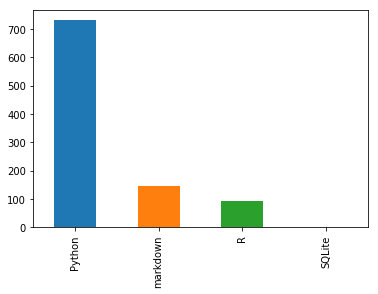

In [35]:
df['Language'].value_counts().plot(kind = 'bar')

While it's not surpising that Python is the most common language for kernels, it's surpising that __R__ is used less often than markdown.

# Limitations

The data above is not real-time.  Thus, as time goes on, the statistics in this notebook will no longer be correct.